In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from scipy.special import factorial
from scipy.special import assoc_laguerre
from scipy.special import sph_harm_y

In [146]:
def psi(n,l,m, r,theta, phi):
	a0 = sc.physical_constants["Bohr radius"][0] #(4*np.pi*sc.epsilon_0*sc.hbar**2)/ ((sc.elementary_charge**2)*(sc.electron_mass*sc.proton_mass/(sc.electron_mass + sc.proton_mass)))
	aux = -np.sqrt(((2/(n*a0))**3)*factorial(n-l-1)/(2*n*(factorial(n+l))**3))
	rho = 2*r/(n*a0)
	return aux*(rho**l)*np.exp(-rho/2)*assoc_laguerre(rho,n-l-1,2*l+1)*sph_harm_y(l,m,theta, phi)

In [147]:
a0 = sc.physical_constants["Bohr radius"][0]

r_values = np.linspace(0.0,8*a0,100)
theta_values = np.linspace(0.0,2*np.pi,100)
phi_values = np.linspace(0.0,np.pi,200)

R , Theta, Phi = np.meshgrid(r_values,theta_values,phi_values)

def probability_density(n, l, m, r, theta, phi):
    psi_val = psi(n, l, m, r, theta, phi)
    return np.abs(psi_val)**2 * r**2 * np.sin(theta)

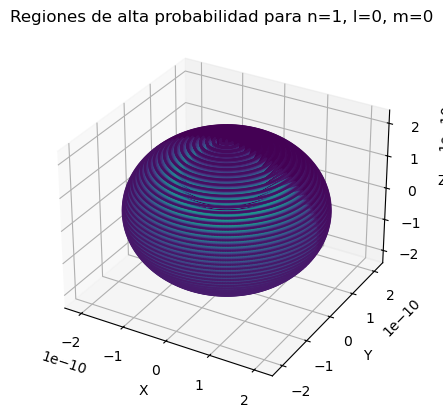

In [148]:
# Parámetros
n = 2  # Número cuántico principal
l = 1  # Número cuántico orbital
m = 0  # Número cuántico magnético

# Calcular la densidad de probabilidad para cada punto
prob_density = np.zeros(R.shape)

for i in range(len(r_values)):
    for j in range(len(theta_values)):
        for k in range(len(phi_values)):
            prob_density[i, j, k] = probability_density(n, l, m, r_values[i], theta_values[j], phi_values[k])

# Para visualización en 3D, usamos las coordenadas cartesianas
# Convertimos de coordenadas esféricas (r, theta, phi) a cartesianas (x, y, z)
x = R * np.sin(Theta) * np.cos(Phi)
y = R * np.sin(Theta) * np.sin(Phi)
z = R * np.cos(Theta)

# Graficar la densidad de probabilidad en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Solo graficamos las regiones de mayor densidad de probabilidad
mask = prob_density > np.max(prob_density) * 0.0000001  # Filtramos valores bajos

ax.scatter(x[mask], y[mask], z[mask], c=prob_density[mask], cmap='viridis', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Regiones de alta probabilidad para n=1, l=0, m=0')

plt.show()

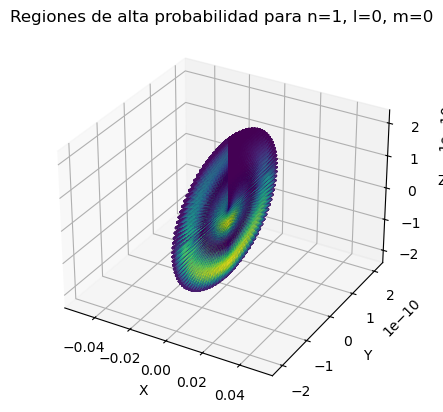

In [149]:
# Graficar la densidad de probabilidad en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Solo graficamos las regiones de mayor densidad de probabilidad
#mask = prob_density > np.max(prob_density) * 0.01  # Filtramos valores bajos

ax.scatter(0, y[mask], z[mask], c=prob_density[mask], cmap='viridis', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Regiones de alta probabilidad para n=1, l=0, m=0')

plt.show()

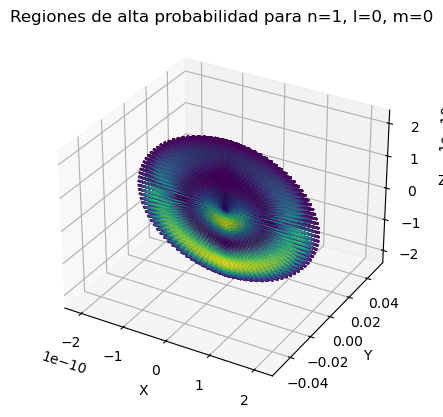

In [150]:
# Graficar la densidad de probabilidad en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Solo graficamos las regiones de mayor densidad de probabilidad
#mask = prob_density > np.max(prob_density) * 0.01  # Filtramos valores bajos

ax.scatter(x[mask], 0, z[mask], c=prob_density[mask], cmap='viridis', s=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Regiones de alta probabilidad para n=1, l=0, m=0')

plt.show()